# Roller Coaster

Roller coasters are thrilling amusement park rides designed to make you squeal and scream! They take you up high, drop you to the ground quickly, and sometimes even spin you upside down before returning to a stop. Today you will be taking control back from the roller coasters and visualizing data covering international roller coaster rankings and roller coaster statistics.

Roller coasters are often split into two main categories based on their construction material: wood or steel. Rankings for the best wood and steel roller coasters from the 2013 to 2018 Golden Ticket Awards are provided in 'Golden_Ticket_Award_Winners_Wood.csv' and 'Golden_Ticket_Award_Winners_Steel.csv', respectively. Load each csv into a DataFrame and inspect it to gain familiarity with the data.

In [233]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [212]:
winners_wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
winners_steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')

print(winners_wood.info())
print(winners_wood.info())

print(winners_wood.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 8 columns):
Rank            180 non-null int64
Name            180 non-null object
Park            180 non-null object
Location        180 non-null object
Supplier        179 non-null object
Year Built      180 non-null int64
Points          180 non-null int64
Year of Rank    180 non-null int64
dtypes: int64(4), object(4)
memory usage: 11.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 8 columns):
Rank            180 non-null int64
Name            180 non-null object
Park            180 non-null object
Location        180 non-null object
Supplier        179 non-null object
Year Built      180 non-null int64
Points          180 non-null int64
Year of Rank    180 non-null int64
dtypes: int64(4), object(4)
memory usage: 11.4+ KB
None
   Rank               Name                       Park             Location  \
0     1       Boulder Dash        

In [171]:
print(winners_wood.Name.nunique())
print(winners_steel.Name.nunique())
print(winners_wood.Park.nunique())
print(winners_steel.Park.nunique())

# Number of years in the dataframe:

# Checking for number of ranks per year

print('Number of ranks per year:')

for year in range(2013, 2019):
    print(f"Number of wood rankings for year {year}: {winners_wood[winners_wood['Year of Rank'] == year].Rank.nunique()}")

print('------------------------------------------------')
          
for year in range(2013, 2019):          
    print(f"Number of steel rankings for year {year}: {winners_steel[winners_steel['Year of Rank'] == year].Rank.nunique()}")

# Checking for number of unique parks per year
print('------------------------------------------------')
print("Number of unique parks per year")
          
for year in range(2013, 2019):
    print(f"Number of parks (wood) per year {year}: {winners_wood[winners_wood['Year of Rank'] == year].Park.nunique()}")          

print('------------------------------------------------')          
          
for year in range(2013, 2019):
    print(f"Number of parks (steel) per year {year}: {winners_steel[winners_steel['Year of Rank'] == year].Park.nunique()}") 



# Wood rollercoasters first:
# Generate a list of unique roller coasters from the dataframe:

wood_coasters = winners_wood['Name'].unique().tolist()  
          
# Check which roller coasters are accounted for in each year of the dataframe (6 years):
print('Wooden roller coasters appearing in all six years:')
for coaster in wood_coasters:
    if len(winners_wood[winners_wood['Name'] == coaster]['Year of Rank'].unique()) == 6:
        print(f"Roller Coaster {coaster} appears in these years: {winners_wood[winners_wood['Name'] == coaster]['Year of Rank'].tolist()}")
        print(f"Roller Coaster {coaster} rank per year: {winners_wood[winners_wood['Name'] == coaster]['Rank'].tolist()}")
        


# Steel rollercoasters:
# Generate a list of unique steel rollercoasters from the dataframe

steel_coasters = winners_steel['Name'].unique().tolist()
print('Steel roller coasters appearing all six years:')

              
for coaster in steel_coasters:
    if len(winners_steel[winners_steel['Name'] == coaster]['Year of Rank'].unique()) == 6:
        print(f"Roller Coaster {coaster} appears in these years: {winners_steel[winners_steel['Name'] == coaster]['Year of Rank'].unique()}")

61
63
54
36
Number of ranks per year:
Number of wood rankings for year 2013: 10
Number of wood rankings for year 2014: 10
Number of wood rankings for year 2015: 10
Number of wood rankings for year 2016: 49
Number of wood rankings for year 2017: 48
Number of wood rankings for year 2018: 47
------------------------------------------------
Number of steel rankings for year 2013: 10
Number of steel rankings for year 2014: 10
Number of steel rankings for year 2015: 10
Number of steel rankings for year 2016: 45
Number of steel rankings for year 2017: 45
Number of steel rankings for year 2018: 49
------------------------------------------------
Number of unique parks per year
Number of parks (wood) per year 2013: 10
Number of parks (wood) per year 2014: 10
Number of parks (wood) per year 2015: 10
Number of parks (wood) per year 2016: 41
Number of parks (wood) per year 2017: 40
Number of parks (wood) per year 2018: 40
------------------------------------------------
Number of parks (steel) per

In [428]:
# El Toro has several duplicates as the name occurs in two different parks:

print(winners_wood[winners_wood['Name'] == 'El Toro']['Rank'])

1      2
11     2
21     2
32     3
80     1
131    2
Name: Rank, dtype: int64


In [429]:
# It's likely that index 55 and 120 are from the other 'El Toro', 
# The values deviate too much from the trend. Dropping these from the df as we won't need the other 'El Toro' here anyway

winners_wood = winners_wood.drop([winners_wood.index[55], winners_wood.index[120]])
print(winners_wood[winners_wood['Name'] == 'El Toro']['Rank'])

1      2
11     2
21     2
32     3
80     1
131    2
Name: Rank, dtype: int64


[Text(0, 0, ''),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10')]

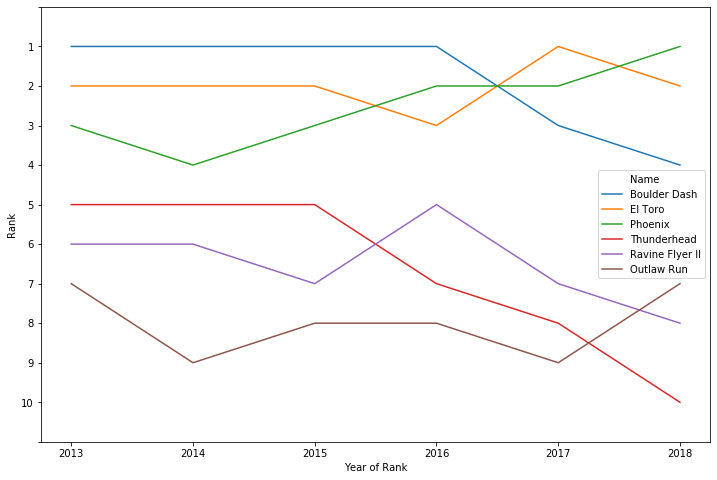

In [216]:
# Creating a new frame including only these roller coasters:

df_wood = winners_wood[(winners_wood['Name'] == 'Boulder Dash')|(winners_wood['Name'] == 'El Toro')\
                       |(winners_wood['Name'] == 'Phoenix')|(winners_wood['Name'] == 'Thunderhead')\
                       |(winners_wood['Name'] == 'Ravine Flyer II')|(winners_wood['Name'] == 'Outlaw Run')]

# Plotting these six roller coasters in a frame:

plt.figure(figsize=(12, 8))

ax = plt.subplot()

sns.lineplot(data = df_wood, x='Year of Rank', y='Rank', hue="Name")

ax.invert_yaxis()
ax.set_yticks(range(0,12))
ax.set_yticklabels(['', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

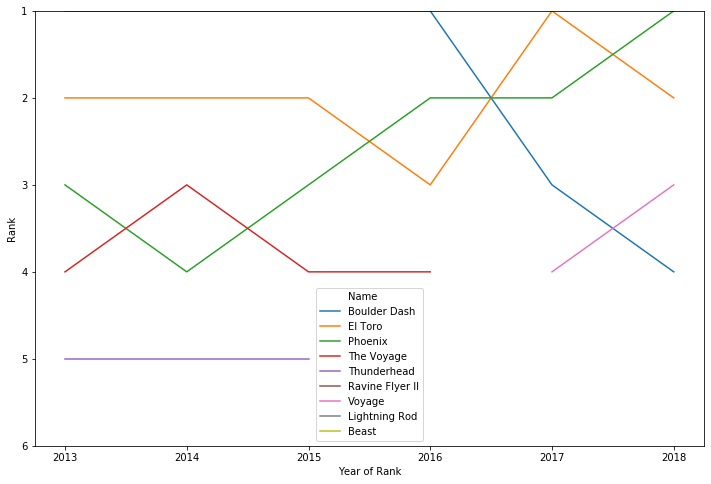

In [213]:
w_top_n_rankings = winners_wood[winners_wood['Rank'] <= 5]

plt.figure(figsize=(12,8))
ax2 = plt.subplot()

sns.lineplot(data=w_top_n_rankings, x='Year of Rank', y='Rank', hue='Name')

ax2.invert_yaxis()

ax2.set_yticks(range(1,7))

In [197]:
# Line looks broken up.. To confirm, 'Voyage' and 'The Voyage' are the same roller coaster:

print(w_top_n_rankings[(winners_wood['Name'] == 'Voyage')|(winners_wood['Name'] == 'The Voyage')])

     Rank        Name           Park           Location       Supplier  \
3       4  The Voyage  Holiday World  Santa Claus, Ind.  Gravity Group   
12      3  The Voyage  Holiday World  Santa Claus, Ind.  Gravity Group   
23      4  The Voyage  Holiday World  Santa Claus, Ind.  Gravity Group   
33      4  The Voyage  Holiday World  Santa Claus, Ind.  Gravity Group   
83      4      Voyage  Holiday World  Santa Claus, Ind.  Gravity Group   
132     3      Voyage  Holiday World  Santa Claus, Ind.  Gravity Group   

     Year Built  Points  Year of Rank  
3          2006    1086          2013  
12         2006    1129          2014  
23         2006    1184          2015  
33         2006    1028          2016  
83         2006    1113          2017  
132        2006    1086          2018  


D:\Users\twan\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


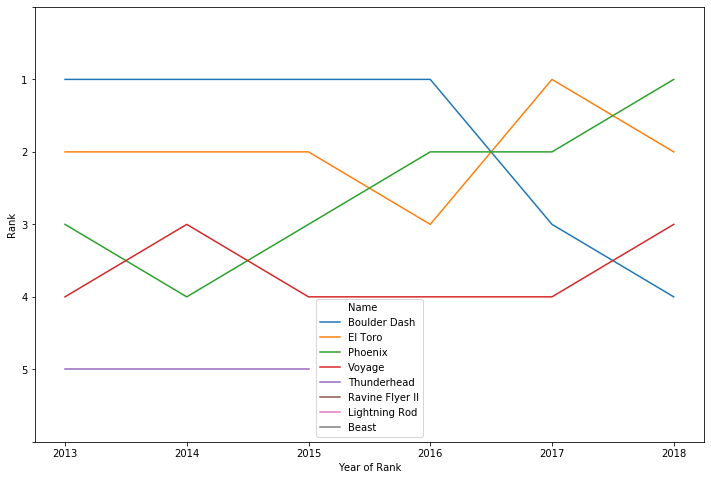

In [229]:
# Remove the 'The ' from 'Voyage' and plot again:

winners_wood['Name'] = winners_wood['Name'].replace('The ', '', regex=True)

w_top_n_rankings = winners_wood[winners_wood['Rank'] <= 5]

plt.figure(figsize=(12,8))
ax2 = plt.subplot()

sns.lineplot(data=w_top_n_rankings, x='Year of Rank', y='Rank', hue='Name')

ax2.invert_yaxis()
ax2.set_yticks(range(0,7))
ax2.set_yticklabels(['', '1', '2', '3', '4', '5'])

plt.show()

In [317]:
# New dataframe providing statistics about particular rollercoasters

df_rc = pd.read_csv('roller_coasters.csv').dropna()

print(df_rc.head())
print(df_rc.info())

            name material_type seating_type  speed  height  length  \
0       Goudurix         Steel     Sit Down   75.0    37.0   950.0   
1  Dream catcher         Steel    Suspended   45.0    25.0   600.0   
2     Alucinakis         Steel     Sit Down   30.0     8.0   250.0   
3       Anaconda        Wooden     Sit Down   85.0    35.0  1200.0   
4         Azteka         Steel     Sit Down   55.0    17.0   500.0   

   num_inversions     manufacturer            park            status  
0             7.0           Vekoma    Parc Asterix  status.operating  
1             0.0           Vekoma   Bobbejaanland  status.operating  
2             0.0         Zamperla    Terra Mítica  status.operating  
3             0.0  William J. Cobb  Walygator Parc  status.operating  
4             0.0           Soquet          Le Pal  status.operating  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1279 entries, 0 to 2799
Data columns (total 10 columns):
name              1279 non-null object
materia

In [335]:
# Histogram regarding speed of different roller coasters

min_speed = np.min(df_rc.speed)
max_speed = np.max(df_rc.speed)
avg_speed = np.mean(df_rc.speed)
med_speed = np.median(df_rc.speed)
print(min_speed)
print(max_speed)

print(df_rc[df_rc['speed'] == 0.0].name)
print(df_rc[df_rc['speed'] == 240.0].name)

0.0
240.0
1835                          Dragonfire
2499                         Wilde Hilde
2505               Unnamed Hyper Coaster
2507              Unnamed Family Dueling
2508                  Unnamed Wing Rider
2510                       Forest Trains
2515                   Alien vs Predator
2516    Sons of Anarchy & Weyland Yutani
2517                      Wings Over Rio
2538                       Non Renseigné
2539                       Non Renseigné
2543                          Coco Beach
2589                  Lieveheersbeestjes
Name: name, dtype: object
1397    Formula Rossa
Name: name, dtype: object


Speed op 0.0kph is unlikely to be correct, so range of the histogram is set to be upwards of 4kph to ignore NaN or otherwise incorrect values.

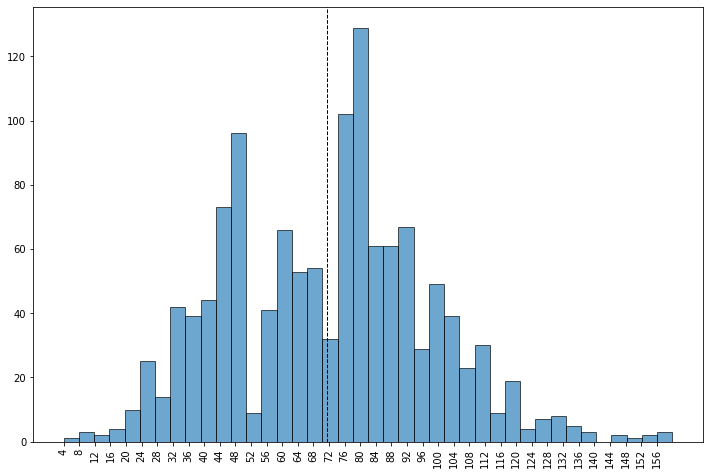

In [430]:
plt.figure(figsize=(12, 8))

ax3 = plt.subplot()

ax3.hist(df_rc['speed'], bins=40, range=(4,160), edgecolor='k', alpha=0.65)
plt.axvline(avg_speed, color='k', linestyle='dashed', linewidth=1)
#plt.axvline(med_speed, color='r', linestyle='dashed', linewidth=1)

ax3.set_xticks(range(4,160,4))
plt.xticks(rotation=90)
plt.show()

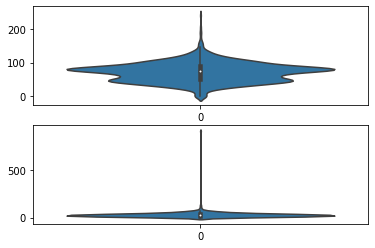

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

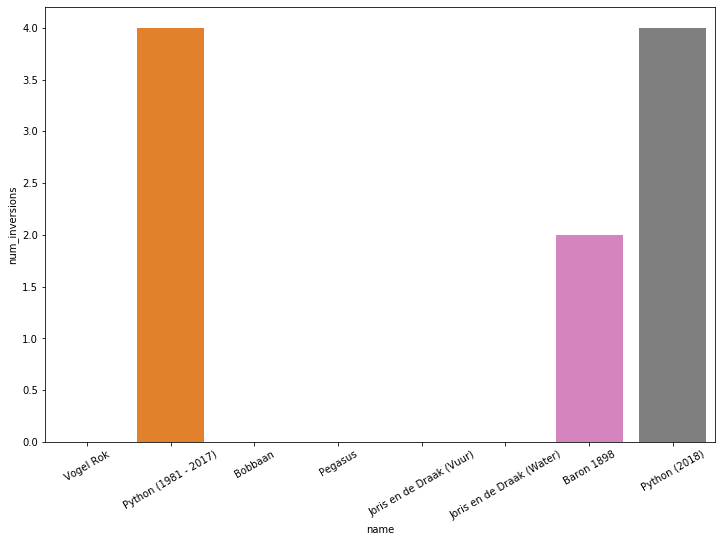

In [359]:
efteling = df_rc[df_rc['park'] == 'Efteling']

plt.figure(figsize=(12,8))

ax4 = plt.subplot()

sns.barplot(data=efteling, x='name', y='num_inversions')

plt.xticks(rotation=30)


In [412]:
statuses = df_rc.status.unique().tolist()

status_counts = []

for status in statuses:
    status_counts.append(len(df_rc[df_rc['status'] == status]))

print(statuses) 
print(status_counts)


['status.operating', 'status.relocated', 'status.retracked', 'status.closed.definitely', 'status.closed.temporarily', 'status.unknown', 'status.construction', 'status.announced']
[1034, 15, 16, 169, 8, 4, 17, 16]


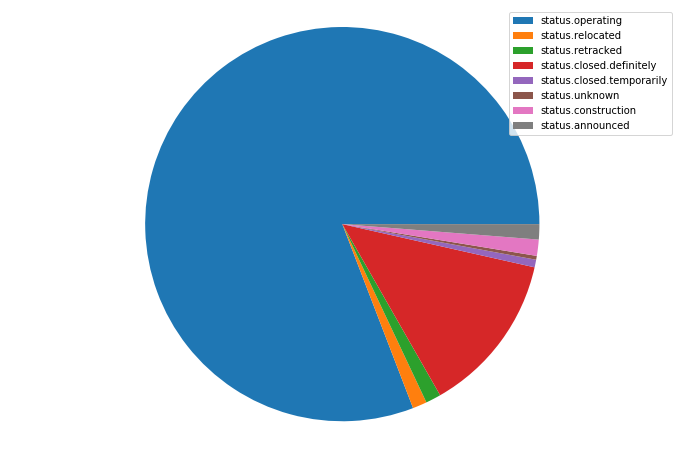

In [413]:
plt.figure(figsize=(12,8))
plt.pie(status_counts)
plt.axis('equal')


plt.legend(statuses)

plt.show()

['status.operating', 'status.closed.definitely']
[1034, 169]


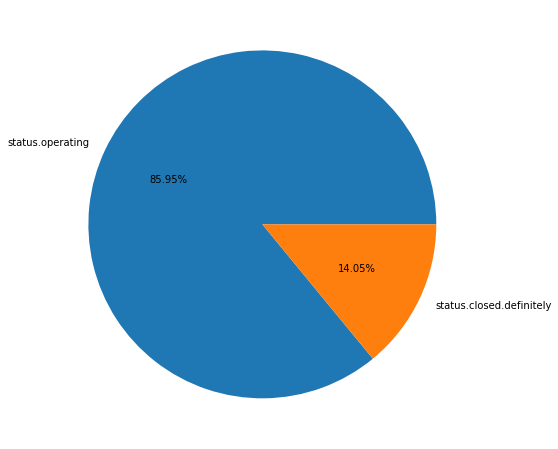

In [417]:
statuses = df_rc.status.unique().tolist()

status_counts2 = []
statuses_2 = []

for status in statuses:
    if len(df_rc[df_rc['status'] == status])>100:
        status_counts2.append(len(df_rc[df_rc['status'] == status]))
        statuses_2.append(status)

print(statuses_2) 
print(status_counts2)

plt.figure(figsize=(12,8))
plt.pie(status_counts2, labels=statuses_2, autopct='%0.2f%%')

plt.show()

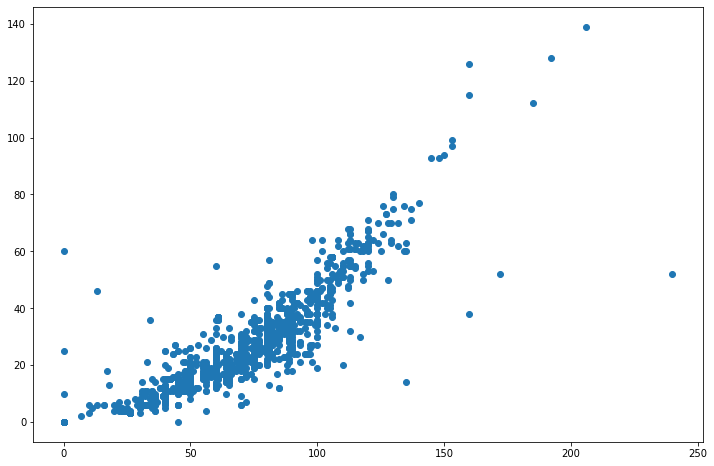

In [427]:
plt.figure(figsize=(12,8))

# The df includes an entry where the height is over 800 meters (tallest is 139m); the following cleans this up.
# Note that the fastest roller coaster is indeed 240kph (Formula Rossa, Abu Dhabi)

df_rc_cleaned = df_rc[(df_rc['height'] < 140)]

ax7 = plt.subplot()

plt.scatter(df_rc_cleaned['speed'], df_rc_cleaned['height'])


plt.show()

Text(0.5, 1.0, 'Distribition of Length')

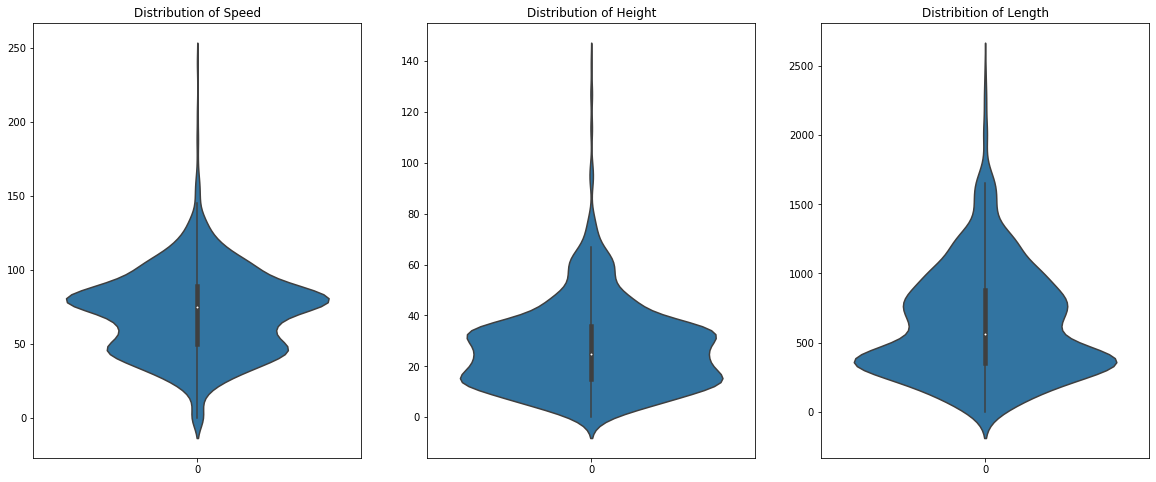

In [443]:
plt.figure(figsize=(20, 8))

plt.subplot(1,3,1)
sns.violinplot(data=df_rc['speed'])
plt.title('Distribution of Speed')

plt.subplot(1,3,2)
sns.violinplot(data=df_rc_cleaned['height'])
plt.title('Distribution of Height')

plt.subplot(1,3,3)
sns.violinplot(data=df_rc['length'])
plt.title('Distribition of Length')

#plt.subplots_adjust(wspace=1)